# Projeto 3 - Rating de filmes (IMDB)

#### Por: Marcelo Lisboa de Castro Reis, Tiago Niemeyer Bergamo  e Bruno Kaczelnik- 2C Engenharia Insper

A partir do elenco, diretores, gênero do filme, ratings de filmes da mesma “linha”, bilheteria, pretendemos avaliar qual será a nota que um filme receberá. 

**O nosso projeto pode ser encontrado no seguinte GitHub:** https://github.com/Marcelolcr/Projeto-1---Ciencia-de-Dados.git

**Referências (Link do dataset):** 
- https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset
- https://datasets.imdbws.com/


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from random import shuffle

In [2]:
#Criando o dataframe Treinamento
imdb = pd.read_csv('movie_metadata.csv')
imdb["movie_title"] = [k.replace("\xa0","") for k in imdb["movie_title"]]
imdb = imdb.set_index('movie_title')
imdb = imdb.drop(['aspect_ratio','movie_imdb_link','facenumber_in_poster'], 1)
imdb.head()#sort_values(by='gross', ascending=False).head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,plot_keywords,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,avatar|future|marine|native|paraplegic,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,goddess|marriage ceremony|marriage proposal|pi...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,0
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,bomb|espionage|sequel|spy|terrorist,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,deception|imprisonment|lawlessness|police offi...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,0


In [3]:
def Evaluation (column):
    if column['imdb_score'] >= 8.0 :
        return 'Muito Bom'
    if column['imdb_score'] < 8.0 and column['imdb_score'] >= 6.5:
        return 'Bom'
    if column['imdb_score'] >= 5.0 and column['imdb_score'] < 6.5:
        return 'Neutro'
    if column['imdb_score'] < 5.0 and column['imdb_score'] >= 3.0:
        return 'Ruim'
    if column['imdb_score'] < 3.0:
        return 'Muito Ruim'

In [4]:
apply = imdb.apply (lambda column: Evaluation (column), axis=1)

In [5]:
imdb['Evaluation'] = apply

In [144]:
imdb.head(5)
#nova tabela com nome do filme e com nome do

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Evaluation
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000,Bom
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,0,Bom
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000,Bom
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000,Muito Bom
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,0,Bom


In [6]:
#MB = []
#B = []
#N = []
#R = []
#MR = []
#gruposclassifi = []
#classificacoes = {"Muito Bom":MB,"Bom":B,"Neutro":N,"Ruim":R,"Muito Ruim":MR}
#
#for i in classificacoes.keys():
#    a = [k.replace("\xa0","") for k in imdb.loc[imdb["Evaluation"] == str(i)].index.values]
#    for j in a:
#        j.strip
#        classificacoes[i].append(j)
#    gruposclassifi.append(classificacoes[i])
#    
#Treinamanto =[]

nomes = imdb.index.tolist()
shuffle(nomes)
nomes

# 1 Lista com listas. Nessas listas terá o diretor e os autores. 
# Outra lista com as evaluations.

#Duas listas importantes. Lista de Filmes e Lista de classificação do filme. As duas tem que bater, não pode ter diferença.

['Fiza',
 'Guiana 1838',
 'The Original Kings of Comedy',
 'Just Like Heaven',
 'Hearts in Atlantis',
 'Zombie Hunter',
 'Strangers with Candy            ',
 'Charly',
 "Hart's War",
 'A View to a Kill',
 'Deadline Gallipoli            ',
 'Side Effects',
 'Taxi to the Dark Side',
 'Tanner Hall',
 'Cradle 2 the Grave',
 'The Score',
 'Held Up',
 'Crazy, Stupid, Love.',
 'The Last Legion',
 'The 40-Year-Old Virgin',
 '24 7: Twenty Four Seven',
 'Detention of the Dead',
 'Star Trek: First Contact',
 'The Adventures of Elmo in Grouchland',
 'A Christmas Carol',
 'Barfi',
 'R.I.P.D.',
 'The Walking Deceased',
 'Sublime',
 'Josie and the Pussycats',
 'In the Name of the King: The Last Job',
 'Amélie',
 'Only the Strong',
 'Blue Like Jazz',
 'Charlie and the Chocolate Factory',
 'Money Monster',
 'The Dark Knight Rises',
 'Final Destination 5',
 'Modern Times',
 'American Psycho',
 'Fear Clinic',
 'Pound of Flesh',
 'Ted',
 'A Christmas Story',
 'Mary Reilly',
 'Metropolitan',
 'A Nightmare 

In [110]:
#75% de treinamento
#25% de teste

## Análise Exploratória: ##

C:\Users\marce\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
C:\Users\marce\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


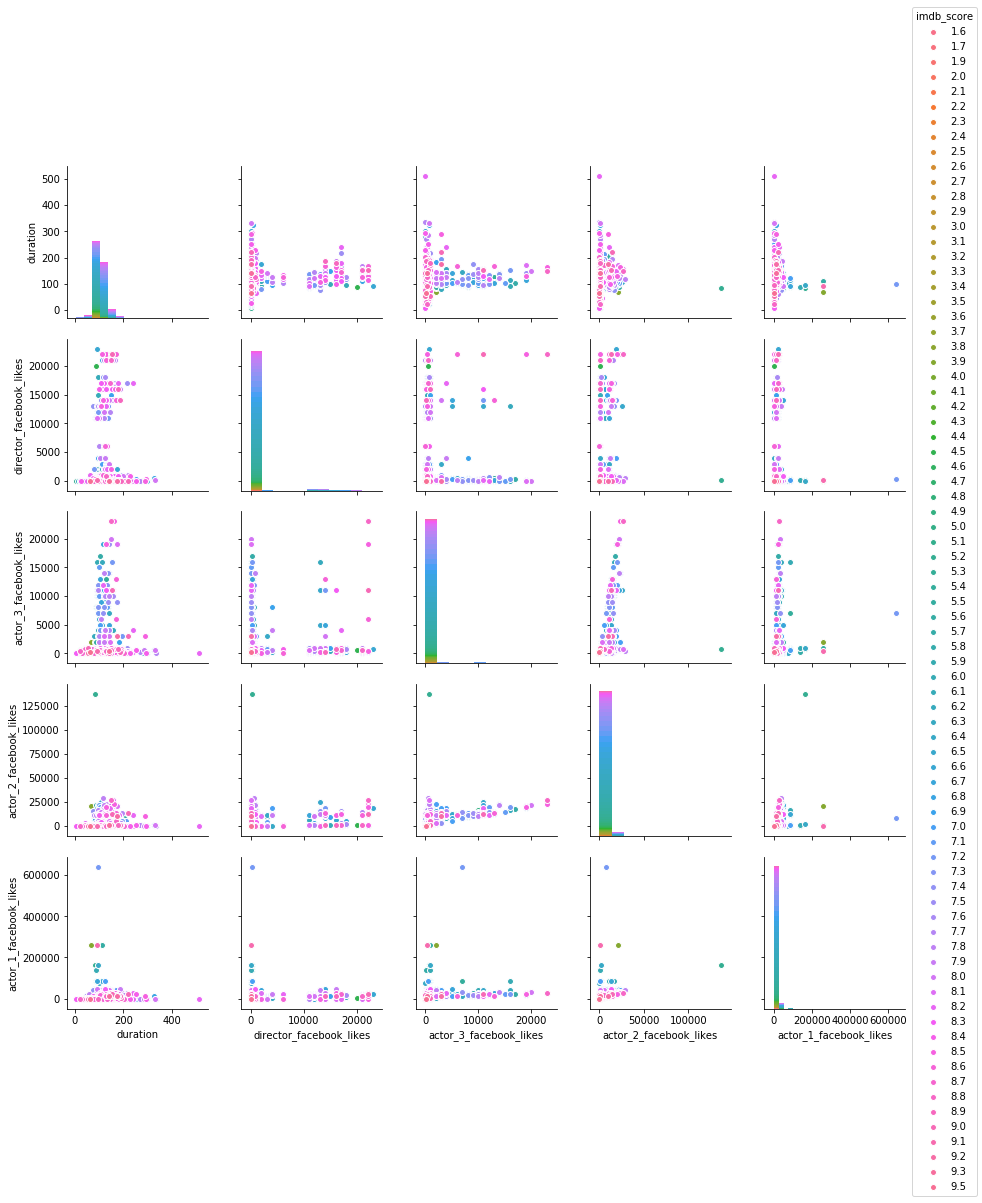

In [17]:
sns.pairplot(imdb, vars=['duration','director_facebook_likes','actor_3_facebook_likes','actor_2_facebook_likes',
                         'actor_1_facebook_likes'], hue='imdb_score')

C:\Users\marce\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
C:\Users\marce\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


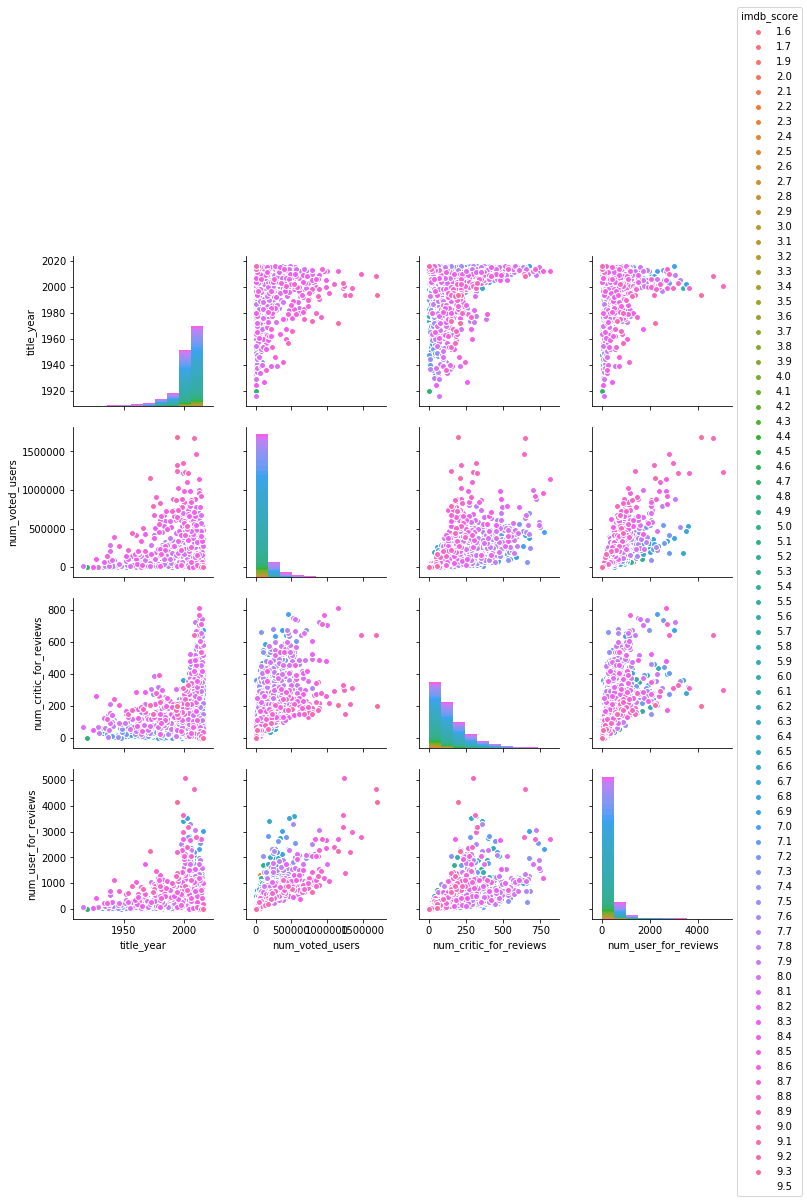

In [14]:
sns.pairplot(imdb, vars=['title_year','num_voted_users','num_critic_for_reviews',
                        'num_user_for_reviews'], hue='imdb_score')

C:\Users\marce\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
C:\Users\marce\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


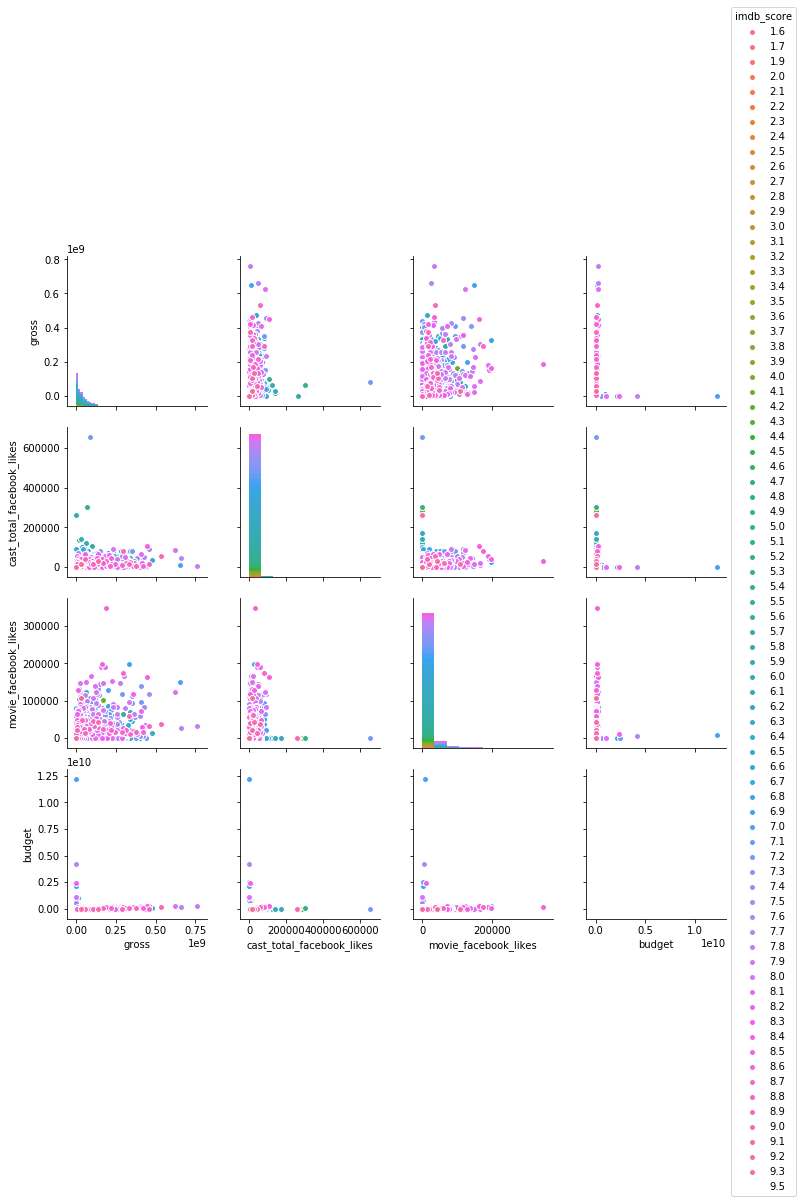

In [15]:
sns.pairplot(imdb, vars=['gross','cast_total_facebook_likes','movie_facebook_likes','budget'], hue='imdb_score')

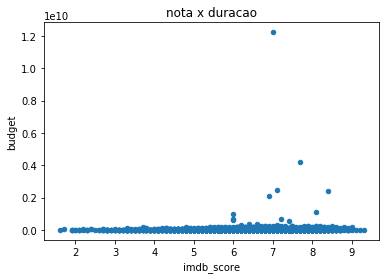

In [19]:
imdb.plot.scatter(title='nota x duracao', y='budget', x='imdb_score') #sipa que podemos desconsiderar budget por falta de dados

In [16]:
imdb.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
num_critic_for_reviews,1.000000,0.258486,0.180674,0.271646,0.190016,0.480601,0.624943,0.263203,0.609387,0.119994,0.275707,0.282306,0.305303,0.683176
duration,0.258486,1.000000,0.173296,0.123558,0.088449,0.250298,0.314765,0.123074,0.328403,0.074276,-0.135038,0.131673,0.261662,0.196605
director_facebook_likes,0.180674,0.173296,1.000000,0.120199,0.090723,0.144945,0.297057,0.119549,0.221890,0.021090,-0.063820,0.119601,0.170802,0.162048
actor_3_facebook_likes,0.271646,0.123558,0.120199,1.000000,0.249927,0.308026,0.287239,0.473920,0.230189,0.047451,0.096137,0.559662,0.052633,0.278844
actor_1_facebook_likes,0.190016,0.088449,0.090723,0.249927,1.000000,0.154468,0.192804,0.951661,0.145461,0.022639,0.086873,0.390487,0.076099,0.135348
gross,0.480601,0.250298,0.144945,0.308026,0.154468,1.000000,0.637271,0.247400,0.559958,0.102179,0.030886,0.262768,0.198021,0.378082
num_voted_users,0.624943,0.314765,0.297057,0.287239,0.192804,0.637271,1.000000,0.265911,0.798406,0.079621,0.007397,0.270790,0.410965,0.537924
cast_total_facebook_likes,0.263203,0.123074,0.119549,0.473920,0.951661,0.247400,0.265911,1.000000,0.206923,0.036557,0.109971,0.628404,0.085787,0.209786
num_user_for_reviews,0.609387,0.328403,0.221890,0.230189,0.145461,0.559958,0.798406,0.206923,1.000000,0.084292,-0.003147,0.219496,0.292475,0.400594
budget,0.119994,0.074276,0.021090,0.047451,0.022639,0.102179,0.079621,0.036557,0.084292,1.000000,0.045726,0.044236,0.030688,0.062039


Olhando as correlações, podemos perceber que tanto o "actor_1_facebook_likes" e "cast_total_facebook_likes" como o "num_voted_users" e "num_user_for_reviews" estão com correlações altíssimas, o que quer dizer que podemos desconsiderar uma das  colunas, pois uma pode explicar a outra. Basta agora escolher qual explica mais.